In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

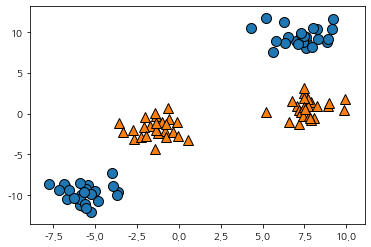

In [3]:
import mglearn
import matplotlib.pyplot as plt
from mglearn.datasets import make_blobs

# 선형적으로 구분되지 않는 클래스를 가진 이진 분류 세트
X, y = make_blobs(centers=4, random_state=8)

# 이진 분류 세트 시각화
# 클래스 2개로 분리, 이진분류
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

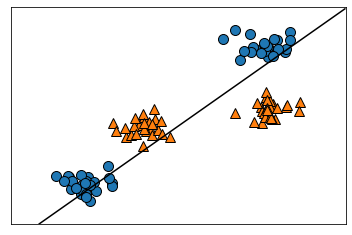

In [4]:
# 선형 분류
from sklearn.svm import LinearSVC

model = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(model, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

Text(0.5, 0, 'feature 1 ** 2')

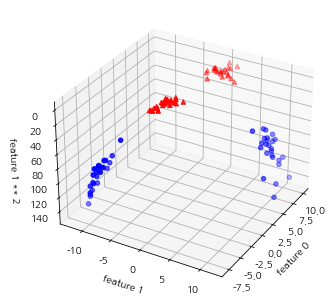

In [12]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
import numpy as np

# 두 번째 특성을 제곱하여 추가
X_new = np.hstack([X, X[:, 1:]**2])

# 3차원 그래프
fig = plt.figure()
ax = Axes3D(fig, azim=-30, elev=-150)

# y == 0인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그림
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b')
# ~ 비트 NOT : x의 비트를 뒤집음
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
ax.set_zlabel('feature 1 ** 2')

(50, 50) (50, 50) (50, 50)


Text(0.5, 0, 'feature 1 ** 2')

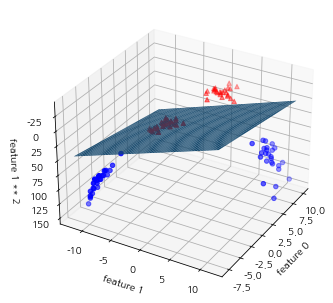

In [6]:
model = LinearSVC().fit(X_new, y)
w, b = model.coef_.ravel(), model.intercept_

# 선형 결정 경계 그리기
# 3차원 그래프
fig = plt.figure()
ax = Axes3D(fig, azim=-30, elev=-150)
xx = np.linspace(X_new[:, 0].min(), X_new[:, 0].max(), 50)
yy = np.linspace(X_new[:, 1].min(), X_new[:, 1].max(), 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = -(w[0] * XX + w[1] * YY + b) / w[2]
print(XX.shape, YY.shape, ZZ.shape)
ax.plot_surface(XX, YY, ZZ)

# y == 0인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그림
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b')
# ~ 비트 NOT : x의 비트를 뒤집음
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
ax.set_zlabel('feature 1 ** 2')

In [41]:
mask

array([False,  True, False, False, False,  True,  True, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
        True, False,  True, False, False, False,  True,  True,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
        True,  True, False, False, False,  True,  True, False,  True,
        True, False,  True,  True, False,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True, False,
       False,  True, False,  True,  True, False, False, False, False,
       False])

In [40]:
XX, YY = np.meshgrid(xx, yy)
XX

array([[-7.74064658, -7.380042  , -7.01943741, ...,  9.20776885,
         9.56837344,  9.92897802],
       [-7.74064658, -7.380042  , -7.01943741, ...,  9.20776885,
         9.56837344,  9.92897802],
       [-7.74064658, -7.380042  , -7.01943741, ...,  9.20776885,
         9.56837344,  9.92897802],
       ...,
       [-7.74064658, -7.380042  , -7.01943741, ...,  9.20776885,
         9.56837344,  9.92897802],
       [-7.74064658, -7.380042  , -7.01943741, ...,  9.20776885,
         9.56837344,  9.92897802],
       [-7.74064658, -7.380042  , -7.01943741, ...,  9.20776885,
         9.56837344,  9.92897802]])

사용된 서포트 벡터 수: 11


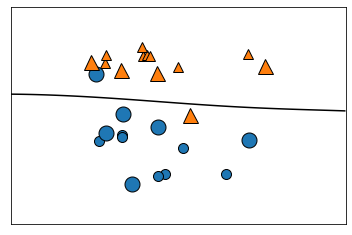

In [46]:
# RBF 커널을 이용한 SVM으로 만든 결정 경계와 서포트 벡터 시각화
from sklearn.svm import SVC

X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

model = SVC(C=1, gamma=0.1).fit(X, y)

mglearn.plots.plot_2d_separator(model, X)

# 서포트 벡터
sv = model.support_vectors_
print('사용된 서포트 벡터 수:', len(sv))
sv_y = model.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_y, s=15)

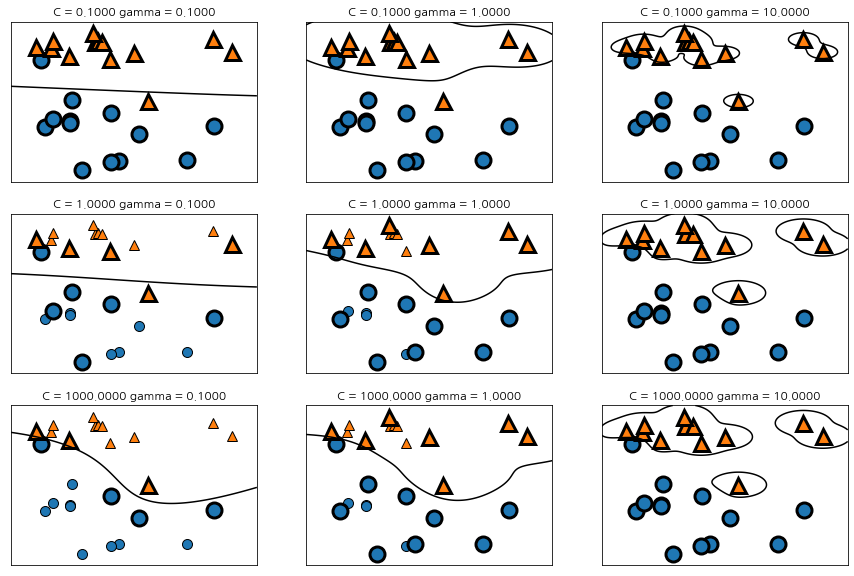

In [48]:
# C와 gamma 매개변수 설정에 따른 결정 경계와 서포트 벡터 시각화
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for C, axs in zip([-1, 0, 3], axes):
    for gamma, ax in zip([-1, 0, 1], axs):
        mglearn.plots.plot_svm(C, gamma, ax)